In [66]:
import gensim
from gensim.models import Word2Vec, Doc2Vec
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from sklearn.cluster import KMeans

In [74]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
plans = pd.read_csv('all_plans.csv', encoding = 'cp1252')

plans['full_text']= plans['description'] + plans['response_1'] + plans['response_2'] + plans['response_3']

In [77]:
plans.head()

,institution_id,name,proposal_id,fund_id,year_id,description,response_1,response_2,response_3,full_text
0,341,Desert,4069,3,2019,The Desert Regional Consortium has made a conc...,All AEBG allocations are approved unanimously ...,All AEBG funds from present and prior years ar...,The Desert Regional Consortium will have calen...,The Desert Regional Consortium has made a conc...
1,364,North Orange,4092,3,2019,Working together with all eight NOCRC Members ...,NOCR followed the established practices when a...,The carry-over funds will help support with th...,NOCRC will engage all eight consortium members...,Working together with all eight NOCRC Members ...
2,342,South Bay (El Camino),4070,3,2019,MISSION\nThe South Bay Adult Education Consort...,The uncertainty of the future funding makes it...,The South Bay Adult Education Consortium remai...,The SBAEC consortium has begun a strategic pla...,MISSION\nThe South Bay Adult Education Consort...
3,390,South Bay (Southwestern),4118,3,2019,Vision: The South Bay Adult Education Consorti...,"The planned allocations for CUSD, SWC, and SUH...",We will focus remaining carryover funds at the...,A consortium-wide summit was held in Spring 20...,Vision: The South Bay Adult Education Consorti...
4,374,San Bernardino,4102,3,2019,In keeping with the Collective Impact approach...,"IAEC Board Members engage in ongoing data, pro...",IAEC Member Districts participate in regularly...,The IAEC Executive Board holds regular meeting...,In keeping with the Collective Impact approach...


## preprocess

In [57]:
#create set of stopwords to use later


stop = set(stopwords.words('english'))
new_stop = {'consortium', 'college', 'district', 'county','member', 'members', 'regions','plans', 
            'also', 'region', 'regional', 'desert','institution', 'north', 'west', 'south', 'east', 
            'valley', 'palo', 'effort','bakersfield', 'use', 'glendale', 'plan', 'would',
            'add', 'must', 'different', 'extremely','year', 'edu', 'http', 'edu', 'ne', 
            'college', 'state', 'use', 'allow', 'take', 'could', 'look',
            'plan', 'joshua', 'tree', 'pearson', 'vue', 'west', 'end', 'corridor',
            'santa', 'clarita', 'valley','palo', 'verde','south', 'orange', 'county', 
            'salano', 'december', 'stanislaus', 'counties', 'marin'}
stop = stop.union(new_stop)

In [91]:
type(stop)

set

In [86]:
stemmer = SnowballStemmer("english")

#create two functions, one that stems and tokenizes, one that just tokenizes
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [95]:
def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

def remove_stopwords(text):
    filtered_words = []
    for word in text:
        if word not in stop:
            filtered_words.append(word)
            
    return filtered_words       

In [101]:
#initiate lists to loop through/append
descriptions = plans['full_text']
all_content = []
tokens = []
flat_tokens = []
flat_stems = []

#initiate labeler??
LabeledSentence1 = gensim.models.doc2vec.TaggedDocument


#create list of list for documents/tokens
for i in descriptions:
    #for each item in 'descriptions', tokenize/stem
    stemmed = tokenize_and_stem(i) 
    tokens = tokenize_only(i)
    flat_stems.extend(stemmed)
    flat_tokens.extend(tokens)
    
    all_content.append(stemmed)

    tokens.append(allwords_tokenized)

#remove stopwords from tokens and stems
filtered_stems = []
filtered_tokens = []
j=0
for doc in all_content:
    filtered = remove_stopwords(doc)
    filtered_stems.append(LabeledSentence1(filtered, [j]))
    j+=1
    
for token in tokens:
    filtered = remove_stopwords(token)
    filtered_tokens.append(filtered)

In [102]:
vocab_frame = pd.DataFrame({'words': flat_tokens}, 
                           index = flat_stems)

## using Doc2Vec

In [103]:
d2v_model = Doc2Vec(filtered_stems)
d2v_model.train(filtered_stems, total_examples=d2v_model.corpus_count, epochs = 10)

In [146]:
test=d2v_model.wv

terms = test.index2word

In [105]:
kmeans = KMeans(n_clusters = 4)
X = kmeans.fit(d2v_model.docvecs.vectors_docs)
labels = kmeans.labels_.tolist()

l = kmeans.fit_predict(d2v_model.docvecs.vectors_docs)

In [106]:
# pca for plotting the doc cluster
pca = PCA(n_components=2)
datapoints = pca.fit_transform(d2v_model.docvecs.vectors_docs)

#pca for plotting the center points
centers = kmeans.cluster_centers_
center_points = pca.transform(centers)

### plot the cluster

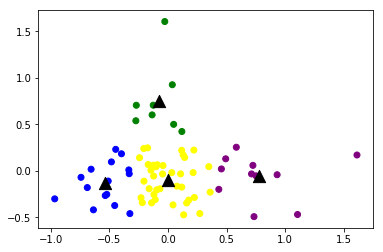

In [107]:
plt.figure()
#make list of colors to iterate through
label1= ["#FFFF00", "#008000", "#0000FF", "#800080"]
color = [label1[i] for i in labels]

#plot document points
plt.scatter(datapoints[:,0], datapoints[:,1], c=color)

#plot center points
plt.scatter(center_points[:,0], center_points[:,1], marker = '^', s=150, c= 'black')

plt.show()

In [108]:
#create word2vec model
#w2v_model = gensim.models.Word2Vec(totalvocab_tokenized, min_count = 3)

In [109]:
#w2v_model.similar_by_word("human", topn=5)

In [110]:
# X =w2v_model.wv.vectors

# from nltk.cluster import KMeansClusterer
# n_cluster = 5
# kclusterer = KMeansClusterer(n_cluster, distance = nltk.cluster.util.cosine_distance, 
#                              repeats = 25)
# assigned_clusters = kclusterer.cluster(X, assign_clusters= True)
# print(assigned_clusters)

In [111]:
institutions = plans['name']
full_text = plans['full_text']
labeled_df = {'institution': institutions, 
              'full_text': full_text,
             'cluster': labels}

df = pd.DataFrame.from_dict(labeled_df)

In [112]:
df.head()

,institution,full_text,cluster
0,Desert,The Desert Regional Consortium has made a conc...,0
1,North Orange,Working together with all eight NOCRC Members ...,3
2,South Bay (El Camino),MISSION\nThe South Bay Adult Education Consort...,2
3,South Bay (Southwestern),Vision: The South Bay Adult Education Consorti...,0
4,San Bernardino,In keeping with the Collective Impact approach...,0


In [149]:
order_centroids = centers.argsort()[:, ::-1] 
df.set_index('cluster', inplace = True)

for i in range(4):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :20]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d instituions:" % i, end='')
    for ids in df.loc[i]['institution']:
        print(' %s,' % ids, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Cluster 0 words: b'fiscally', b"'s", b'focus', b'gaps', b'address', b'curriculum', b'allocate', b'goals', b'high', b'partnerships', b'esl', b'program', b'learners', b'basic', b'data', b'workforce', b'education', b'initiated', b'skills', b'community',

Cluster 0 instituions: Desert, South Bay (Southwestern), San Bernardino, Lake Tahoe, Mt. San Antonio, Victor Valley, Gateway (Merced), Mid Alameda County (Chabot-Las Positas), San Diego East (Grossmont-Cuyamaca), Rio Hondo, Los Angeles, Mendocino-Lake, Ventura County, Coastal North, Southeast Los Angeles, College of the Canyons, North Coast, Allan Hancock, State Center, ACCEL (San Mateo), Northern Alameda County (Peralta), Palo Verde, San Diego, Riverside About Students, Siskiyous, Delta Sierra Alliance, Stanislaus Mother Lode (Yosemite), Santa Monica, Lassen, Tri-Cities, Salinas Valley, Glendale, West End Corridor, Sonoma, Pasadena, Morongo Basin, Barstow,

Cluster 1 words: b'fiscally', b"'s", b'goals', b'address', b'gaps', b'allocate', 